Library and dataset import

In [55]:
from scipy.io import arff
import matplotlib.pyplot as plt
!wget https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/banana.arff -O banana.arff
!wget https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/diamond9.arff -O diamond9.arff
!wget https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/rings.arff -O rings.arff
!wget https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/elly-2d10c13s.arff -O elly.arff
!wget https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/3-spiral.arff -O spiral.arff
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import scipy.cluster.hierarchy as shc
import pandas as pd
from yellowbrick.cluster import KElbowVisualizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from timeit import default_timer

--2021-11-10 16:02:11--  https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/banana.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 96324 (94K) [text/plain]
Saving to: ‘banana.arff’

banana.arff         100%[===================>]  94.07K  --.-KB/s    in 0.005s  

2021-11-10 16:02:11 (17.7 MB/s) - ‘banana.arff’ saved [96324/96324]

--2021-11-10 16:02:11--  https://raw.githubusercontent.com/deric/clustering-benchmark/master/src/main/resources/datasets/artificial/diamond9.arff
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP

# Selected Datasets

## Diamond

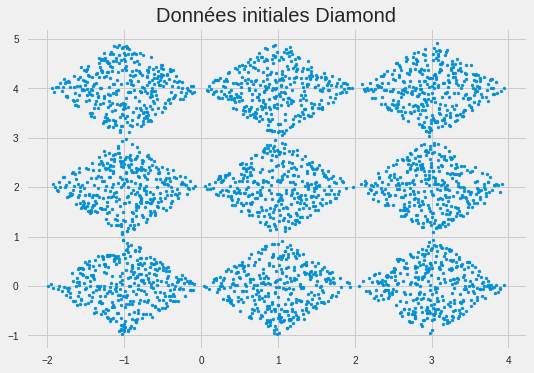

(array([(-1.98666, -2.28882e-03, b'0'), (-1.95108,  3.24707e-02, b'0'),
       (-1.92679, -4.69360e-02, b'0'), ...,
       ( 3.84756,  3.91028e+00, b'8'), ( 3.89923,  3.94684e+00, b'8'),
       ( 3.93759,  4.01599e+00, b'8')],
      dtype=[('x', '<f8'), ('y', '<f8'), ('class', 'S1')]), Dataset: diamond9
	x's type is numeric
	y's type is numeric
	class's type is nominal, range is ('0', '1', '2', '3', '4', '5', '6', '7', '8')
)


In [56]:
diamond_dataset = arff.loadarff(open('diamond9.arff', 'r'))
diamond_ds = [[x[0], x[1]] for x in diamond_dataset[0]]
f0_diamond = [f[0] for f in diamond_ds]
f1_diamond = [f[1] for f in diamond_ds]
plt.scatter(f0_diamond, f1_diamond, s=8)
plt.title("Données initiales Diamond")
plt.show()

print(diamond_dataset)

## Banana

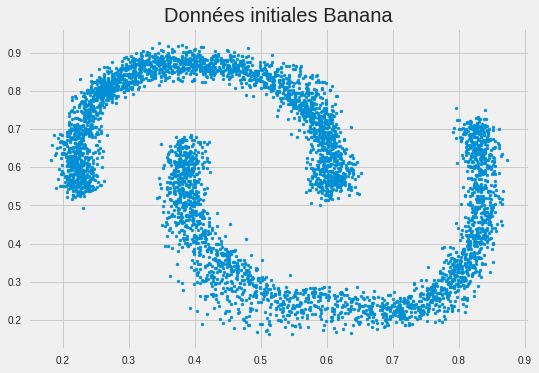

In [57]:
banana_dataset = arff.loadarff(open('banana.arff', 'r'))
banana_ds = [[x[0], x[1]] for x in banana_dataset[0]]
f0_bananas = [f[0] for f in banana_ds]
f1_bananas = [f[1] for f in banana_ds]
plt.scatter(f0_bananas, f1_bananas, s=8)
plt.title("Données initiales Banana")
plt.show()

## Rings

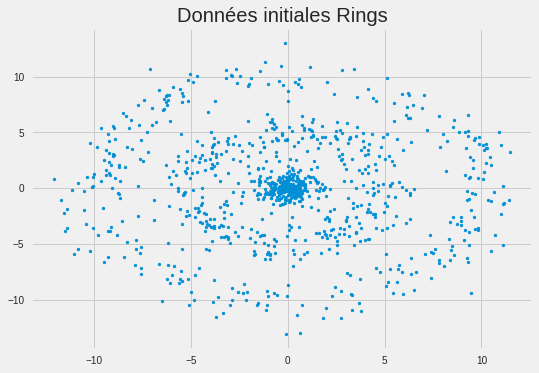

In [58]:
rings_dataset = arff.loadarff(open('rings.arff', 'r'))
rings_ds = [[x[0], x[1]] for x in rings_dataset[0]]
f0_rings = [f[0] for f in rings_ds]
f1_rings = [f[1] for f in rings_ds]
plt.scatter(f0_rings, f1_rings, s=8)
plt.title("Données initiales Rings")
plt.show()

## Elly

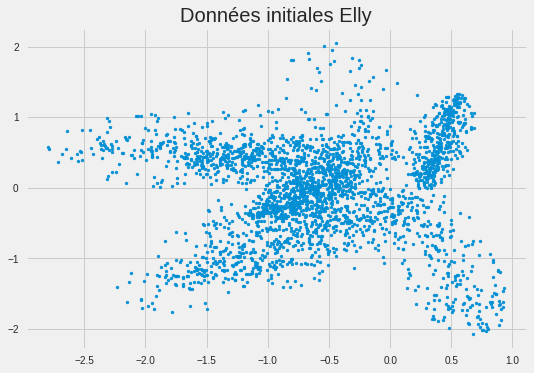

In [59]:
elly_dataset = arff.loadarff(open('elly.arff', 'r'))
elly_ds = [[x[0], x[1]] for x in elly_dataset[0]]
f0_elly = [f[0] for f in elly_ds]
f1_elly = [f[1] for f in elly_ds]
plt.scatter(f0_elly, f1_elly, s=8)
plt.title("Données initiales Elly")
plt.show()

## Spiral

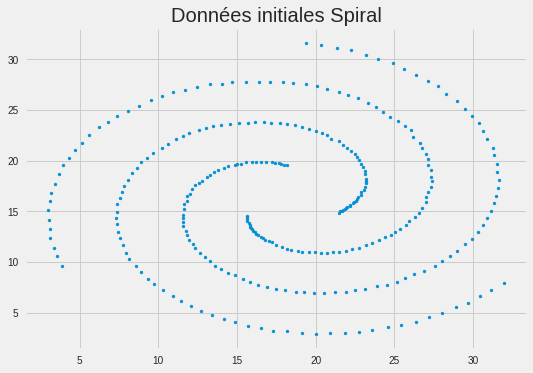

In [60]:
spiral_dataset = arff.loadarff(open('spiral.arff', 'r'))
spiral_ds = [[x[0], x[1]] for x in spiral_dataset[0]]
f0_spiral = [f[0] for f in spiral_ds]
f1_spiral = [f[1] for f in spiral_ds]
plt.scatter(f0_spiral, f1_spiral, s=8)
plt.title("Données initiales Spiral")
plt.show()

# Clustering K-Means

## Iterative method and results evaluation

In [61]:
def KMeans_application(from_n_clusters, to_n_clusters, dataset):
  silhs = []
  dbscs = []
  results = pd.DataFrame()
  for nb_cluster in range(from_n_clusters, to_n_clusters):
    start = default_timer() 
    cl_pred = KMeans(n_clusters=nb_cluster, init='k-means++').fit_predict(dataset)
    stop = default_timer()
    silhs.append(metrics.silhouette_score(dataset, cl_pred, metric='euclidean'))
    results.loc[nb_cluster,'Cluster Number'] = nb_cluster
    results.loc[nb_cluster,'Time'] = stop-start
    results.loc[nb_cluster,'Silhouette coefficient'] = metrics.silhouette_score(dataset, cl_pred, metric='euclidean')
    results.loc[nb_cluster, 'Calinski Harabasz'] = metrics.calinski_harabasz_score(dataset, cl_pred)
    results.loc[nb_cluster, 'Davies Bouldin'] = metrics.davies_bouldin_score(dataset, cl_pred)
  return results, silhs

## Diamond 
First application of the cluster with the given data.

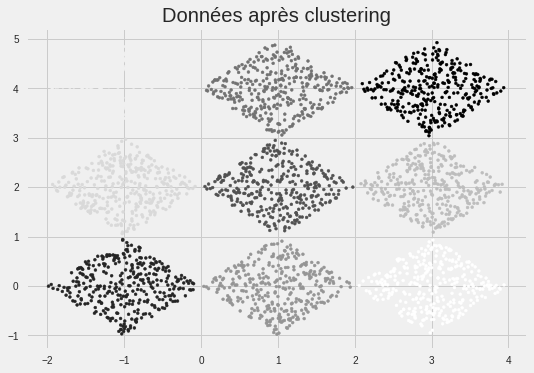

In [62]:
k_means_pred = KMeans(n_clusters=9, init='k-means++').fit_predict(diamond_ds)
plt.scatter(f0_diamond, f1_diamond, c=k_means_pred,s=8)
plt.title("Données après clustering")
plt.show()

### Finding the correct number of clusters

In [63]:
results, silhs_diamond = KMeans_application(6,13,diamond_ds)
results

,Cluster Number,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin
6,6.0,0.091064,0.413576,3127.190095,0.881037
7,7.0,0.074626,0.453963,3510.535135,0.665011
8,8.0,0.069587,0.500118,4348.270750,0.639588
9,9.0,0.084896,0.548737,5855.152268,0.553163
10,10.0,0.105383,0.518798,5456.515329,0.674430
11,11.0,0.120530,0.484152,5159.813558,0.774450
12,12.0,0.166449,0.466287,4934.506290,0.856245


### Silhouette Coefficient

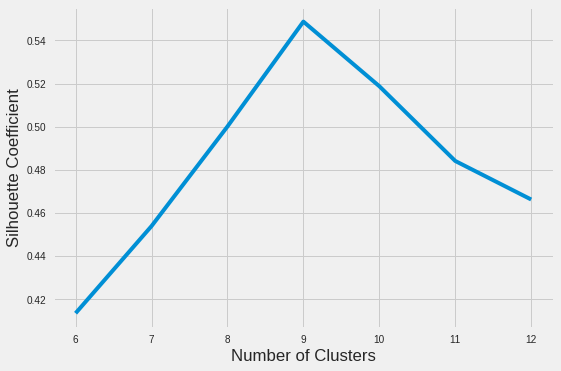

In [64]:
plt.style.use("fivethirtyeight")
plt.plot(range(6, 13), silhs_diamond)
plt.xticks(range(6, 13))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Banana 
First application of the cluster with the given data.

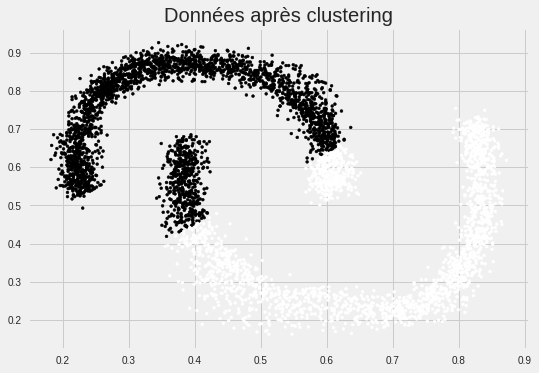

In [65]:
k_means_pred = KMeans(n_clusters=2, init='k-means++').fit_predict(banana_ds)
plt.scatter(f0_bananas, f1_bananas, c=k_means_pred,s=8)
plt.title("Données après clustering")
plt.show()

### Finding the correct number of clusters

In [66]:
results, silhs_banana = KMeans_application(2,6,banana_ds)
results

,Cluster Number,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin
2,2.0,0.060373,0.464522,5689.274072,0.893019
3,3.0,0.069491,0.454381,5407.035119,0.851038
4,4.0,0.097184,0.462279,6018.431121,0.808254
5,5.0,0.115513,0.476280,6728.903290,0.698861


### Silhouette Coefficient

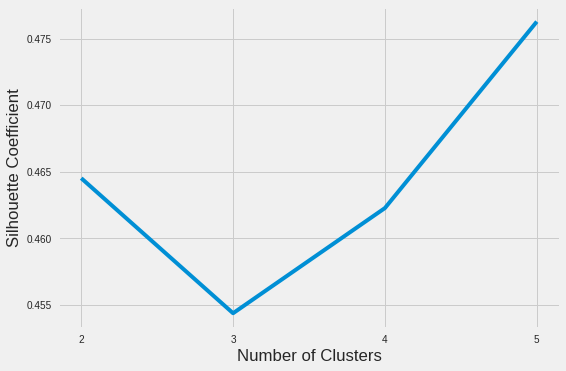

In [67]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 6), silhs_banana)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Rings
First application of the cluster with the given data.

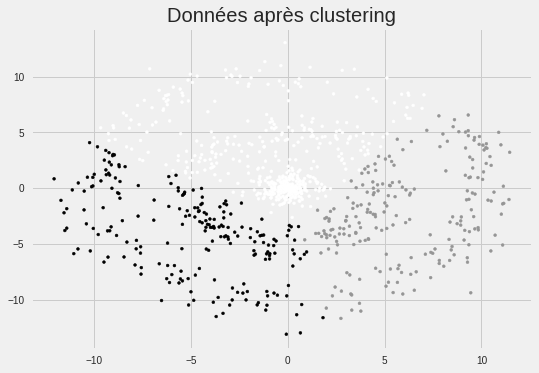

In [68]:
k_means_pred = KMeans(n_clusters=3, init='k-means++').fit_predict(rings_ds)
plt.scatter(f0_rings, f1_rings, c=k_means_pred,s=8)
plt.title("Données après clustering")
plt.show()

### Finding the correct number of clusters

In [69]:
results, silhs_rings = KMeans_application(2,6,rings_ds)
results

,Cluster Number,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin
2,2.0,0.037016,0.351620,432.772289,1.209579
3,3.0,0.052215,0.379165,498.694306,1.046937
4,4.0,0.071160,0.410674,572.919156,0.919993
5,5.0,0.071915,0.437621,654.270156,0.784702


### Silhouette Coefficient

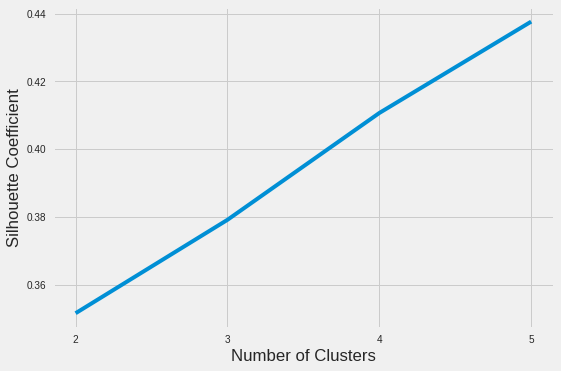

In [70]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 6), silhs_rings)
plt.xticks(range(2, 6))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Elly
First application of the cluster with the given data.

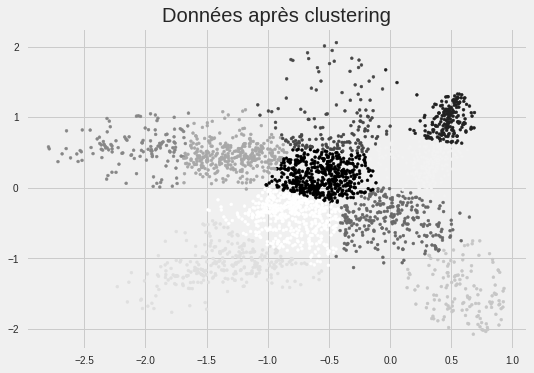

In [71]:
k_means_pred = KMeans(n_clusters=10, init='k-means++').fit_predict(elly_ds)
plt.scatter(f0_elly, f1_elly, c=k_means_pred,s=8)
plt.title("Données après clustering")
plt.show()

### Finding the correct number of clusters

In [72]:
results, silhs_elly = KMeans_application(7,13,elly_ds)
results

,Cluster Number,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin
7,7.0,0.141528,0.407278,2638.673530,0.738914
8,8.0,0.120162,0.403006,2647.259558,0.742782
9,9.0,0.159620,0.400116,2731.718632,0.776224
10,10.0,0.213688,0.411567,2775.040364,0.719749
11,11.0,0.296278,0.406298,2858.430426,0.733546
12,12.0,0.236202,0.398605,2887.395903,0.767249


### Silhouette Coefficient

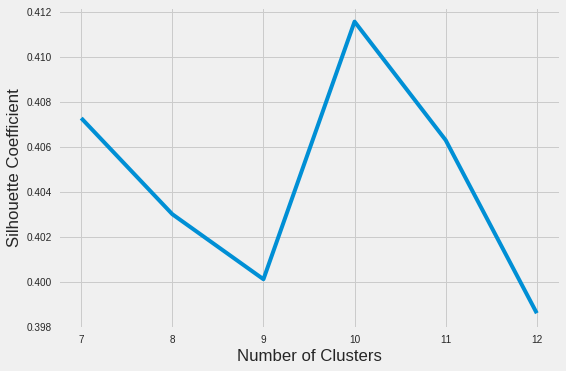

In [73]:
plt.style.use("fivethirtyeight")
plt.plot(range(7, 13), silhs_elly)
plt.xticks(range(7, 13))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

## Spiral 
First application of the cluster with the given data.

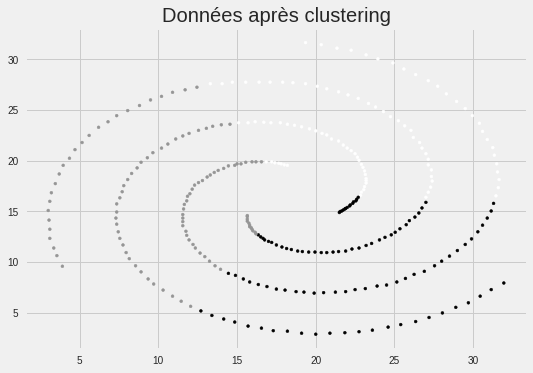

In [74]:
k_means_pred = KMeans(n_clusters=3, init='k-means++').fit_predict(spiral_ds)
plt.scatter(f0_spiral, f1_spiral, c=k_means_pred,s=8)
plt.title("Données après clustering")
plt.show()

### Finding the correct number of clusters

In [75]:
results, silhs_spiral = KMeans_application(2,7,spiral_ds)
results

,Cluster Number,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin
2,2.0,0.048069,0.347005,184.616527,1.167404
3,3.0,0.047169,0.359888,238.295253,0.881698
4,4.0,0.046986,0.354401,245.915067,0.877753
5,5.0,0.055786,0.346020,248.999054,0.888629
6,6.0,0.065651,0.351401,257.367061,0.882658


### Silhouette Coefficient

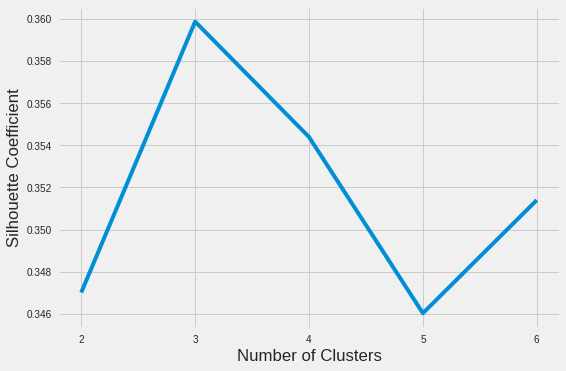

In [76]:
plt.style.use("fivethirtyeight")
plt.plot(range(2, 7), silhs_spiral)
plt.xticks(range(2, 7))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

# Agglomerative Clustering  

## Iterative method and results evaluation

In [77]:
def agglomerative_Application_linkage(nb_clusters, dataset, f0, f1):
  linkages = ['single', 'average', 'complete', 'ward']
  for i in range(len(linkages)):
    agglomerative_pred = AgglomerativeClustering(n_clusters = nb_clusters, linkage=linkages[i]).fit_predict(dataset)
    plt.scatter(f0, f1, c=agglomerative_pred,s=8)
    plt.title("Données après clustering with " + linkages[i] + " linkage")
    plt.show()

In [109]:
def agglomerative_application(min_number_cluster, max_number_clusters, dataset, linkage):
  results = pd.DataFrame()
  for nb_cluster in range(min_number_cluster, max_number_clusters):
    start = default_timer()
    cl_predict = AgglomerativeClustering(n_clusters = nb_cluster, linkage=linkage).fit(dataset)
    stop = default_timer()
    cl_predict_2 = AgglomerativeClustering(n_clusters = nb_cluster, linkage=linkage).fit_predict(dataset)
    results.loc[nb_cluster,'Cluster Number'] = nb_cluster
    results.loc[nb_cluster,'Time'] = stop-start
    results.loc[nb_cluster,'Silhouette coefficient'] = metrics.silhouette_score(dataset, cl_predict.labels_, metric='euclidean')
    results.loc[nb_cluster,'Calinski Harabasz'] = metrics.calinski_harabasz_score(dataset, cl_predict.labels_)
    results.loc[nb_cluster,'Davies Bouldin Score'] = metrics.davies_bouldin_score(dataset, cl_predict_2)
  return results

## Diamond
First application of the cluster with the given data.

### Application with different linkages

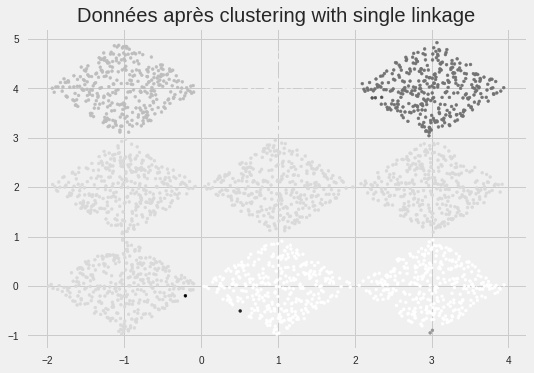

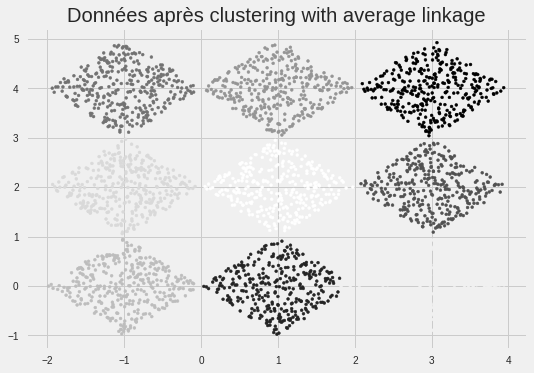

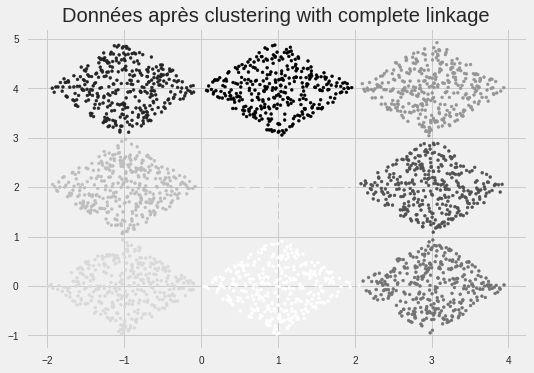

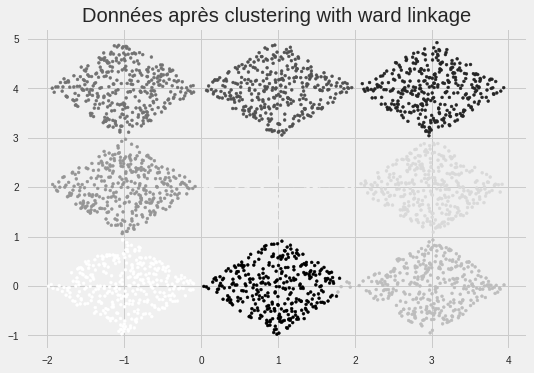

In [79]:
agglomerative_Application_linkage(9, diamond_ds, f0_diamond, f1_diamond)

### Finding the correct number of clusters

In [110]:
results = agglomerative_application(6, 12, diamond_ds, 'complete')
results

,Cluster Number,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin Score
6,6.0,0.094454,0.404849,2781.282883,0.823688
7,7.0,0.091177,0.448093,3102.753211,0.755828
8,8.0,0.097377,0.484787,3907.380977,0.662078
9,9.0,0.089319,0.548679,5853.845043,0.552997
10,10.0,0.131865,0.514465,5438.139178,0.692368
11,11.0,0.129374,0.488352,5128.878588,0.789627


## Banana
First application of the cluster with the given data.

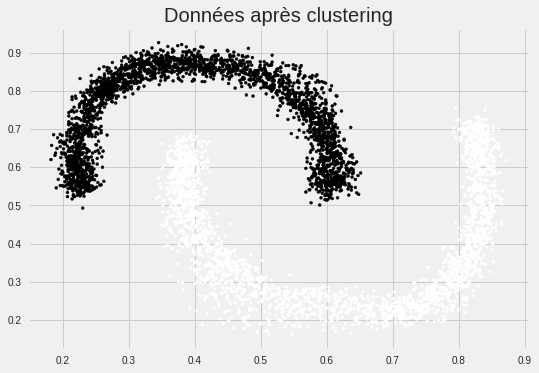

In [81]:
agglomerative_pred = AgglomerativeClustering(n_clusters = 2, linkage='single').fit_predict(banana_ds)
plt.scatter(f0_bananas, f1_bananas, c=agglomerative_pred,s=8)
plt.title("Données après clustering")
plt.show()

###### Application with different linkages




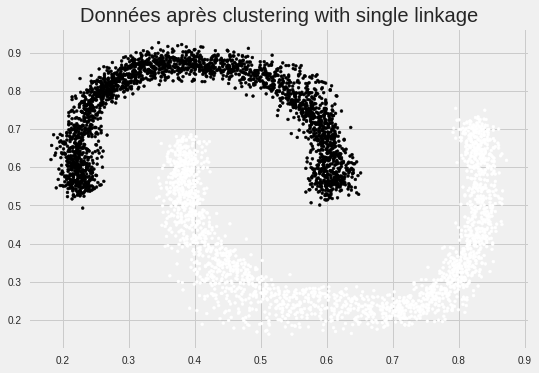

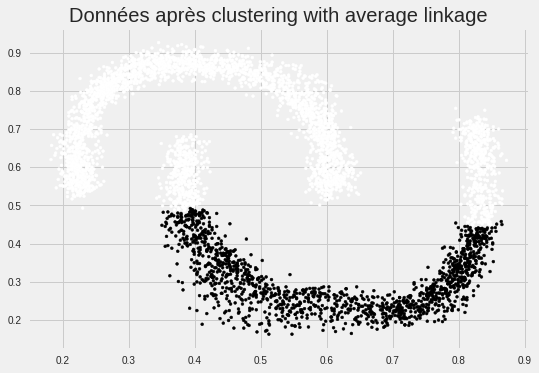

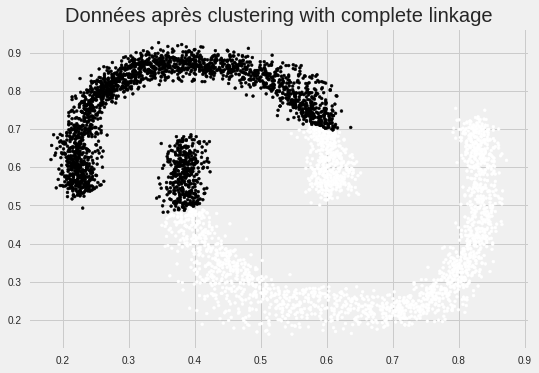

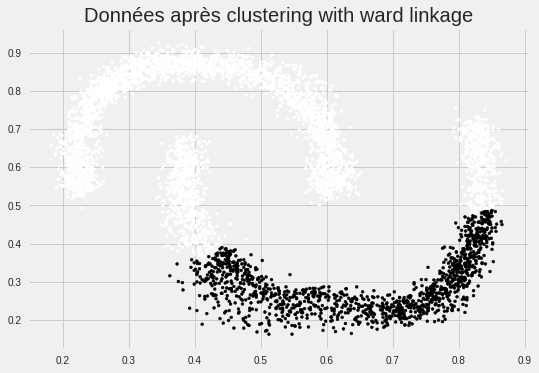

In [112]:
agglomerative_Application_linkage(2, banana_ds, f0_bananas, f1_bananas)

### Finding the correct number of clusters

In [113]:
results = agglomerative_application(2, 6, banana_ds, 'single')
results

,Cluster Number,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin Score
2,2.0,0.113744,0.367331,3751.730467,1.098900
3,3.0,0.115763,0.073919,1875.851848,1.489700
4,4.0,0.116095,0.008131,1250.502840,1.652271
5,5.0,0.113556,-0.106267,939.035822,1.448297


## Rings

### Application with different linkages

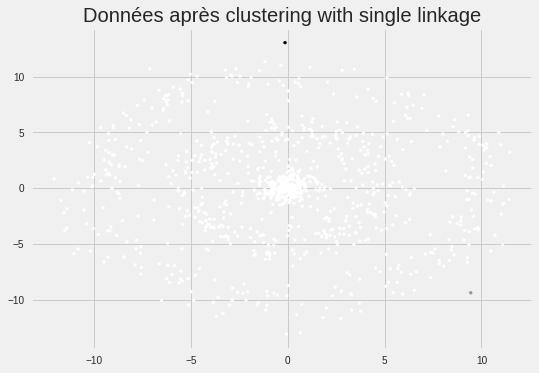

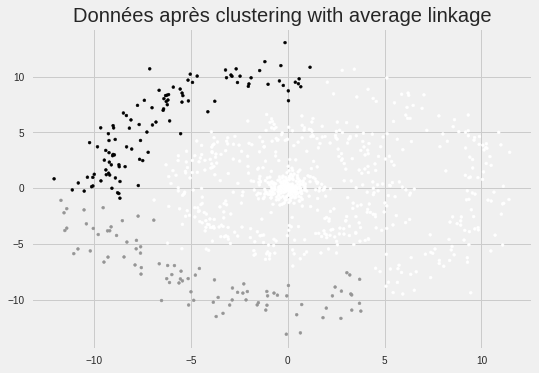

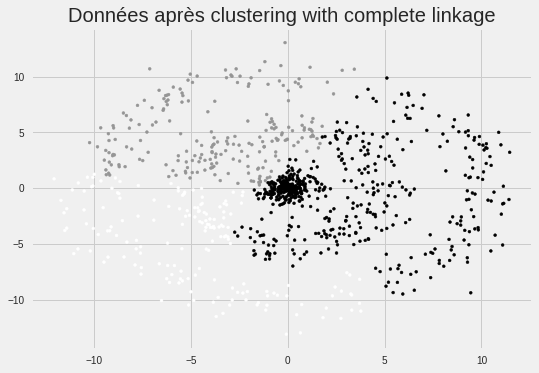

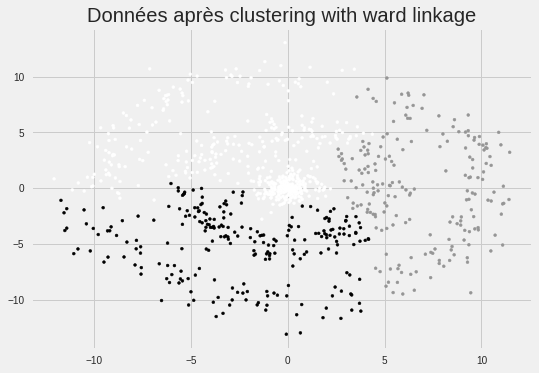

In [84]:
agglomerative_Application_linkage(3, rings_ds, f0_rings, f1_rings)

The method does not work for any linkage on this dataset so it is useless to continue.

## Elly

### Application with different linkages

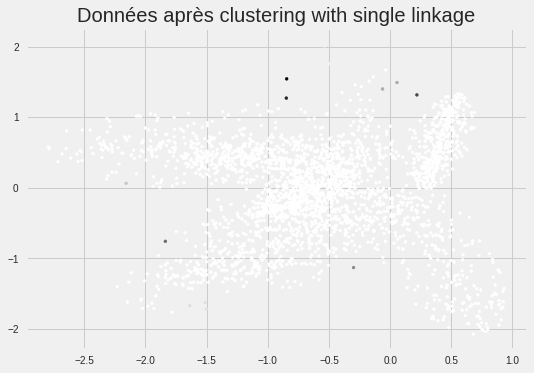

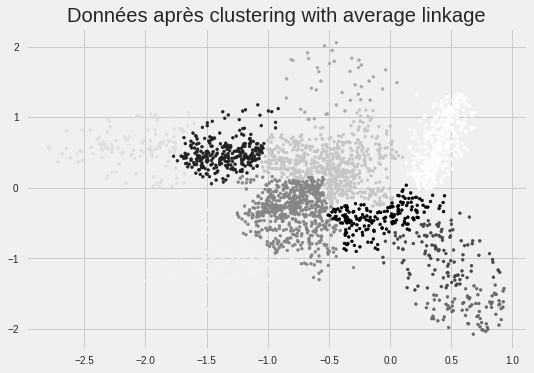

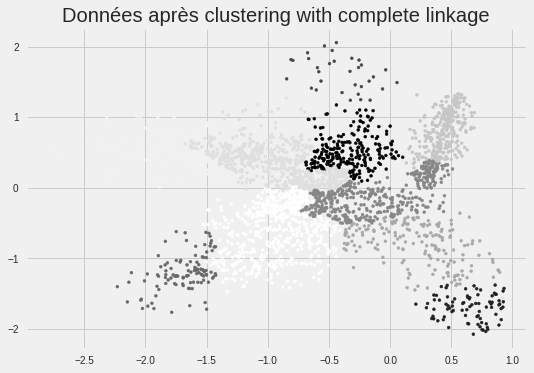

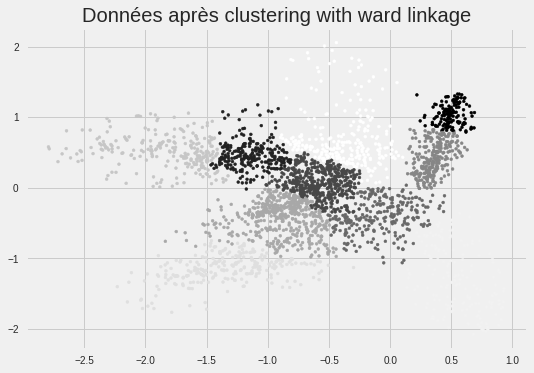

In [85]:
agglomerative_Application_linkage(10, elly_ds, f0_elly, f1_elly)

The method does not work for any linkage on this dataset so it is useless to continue.

## Spiral

### Application with different linkages

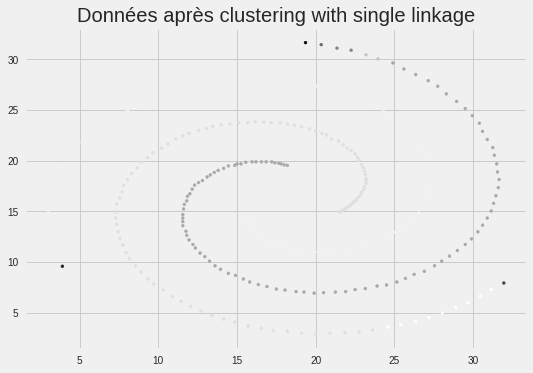

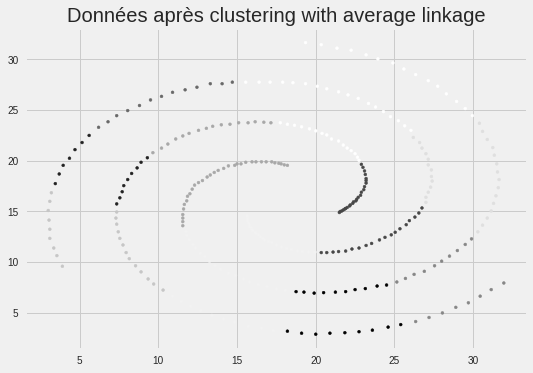

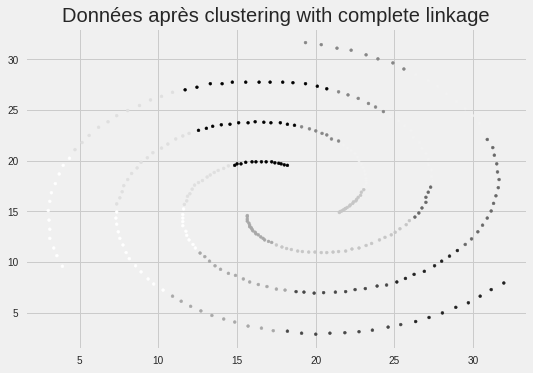

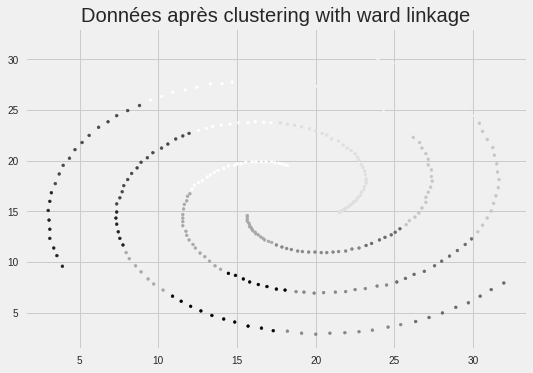

In [86]:
agglomerative_Application_linkage(10, spiral_ds, f0_spiral, f1_spiral)

### Finding the correct number of clusters

In [87]:
results= agglomerative_application(10, spiral_ds, 'single')
results

,Cluster Number,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin Score
2,2.0,0.002213,0.025328,6.149902,6.314198
3,3.0,0.002032,0.001344,5.797852,5.882023
4,4.0,0.002000,-0.078751,4.755537,4.491107
5,5.0,0.002031,-0.150060,4.849445,3.801162
6,6.0,0.002040,-0.157265,4.906249,3.360301
7,7.0,0.002007,-0.189676,8.733037,3.197391
8,8.0,0.002045,-0.223392,7.501207,2.879201
9,9.0,0.001977,-0.224693,7.309062,2.613603


# Clustering DBSCAN

In [88]:
from sklearn import cluster

In [89]:
def find_best_eps(dataset):
  neigh = NearestNeighbors(n_neighbors=2)
  nbrs = neigh.fit(dataset)
  distances, indices = nbrs.kneighbors(dataset)
  distances = np.sort(distances, axis=0)
  distances = distances[:,1]
  plt.plot(distances)

In [90]:
def dbscan_iteration(dataset, min_eps, max_eps, eps_step):
  results = pd.DataFrame()
  for eps in np.arange(min_eps, max_eps, eps_step):
    start = default_timer()
    cl_predict = cluster.DBSCAN(eps = eps).fit_predict(dataset)
    stop = default_timer()
    results.loc[eps, 'Eps value'] = eps
    results.loc[eps, 'Time'] = stop - start
    results.loc[eps,'Silhouette coefficient'] = metrics.silhouette_score(dataset, cl_predict, metric='euclidean')
    results.loc[eps,'Calinski Harabasz'] = metrics.calinski_harabasz_score(dataset, cl_predict)
    results.loc[eps,'Davies Bouldin Score'] = metrics.davies_bouldin_score(dataset, cl_predict)
  return results

In [91]:
def dbscan_application(dataset, f0, f1, eps, min_samples):
  dbscan = cluster.DBSCAN(eps=eps, min_samples=min_samples).fit_predict(dataset)
  plt.scatter(f0, f1, c=dbscan,s=8)
  plt.title("Données après clustering")
  plt.show()

## Diamonds

### Application with "random" min-sample and eps parameters

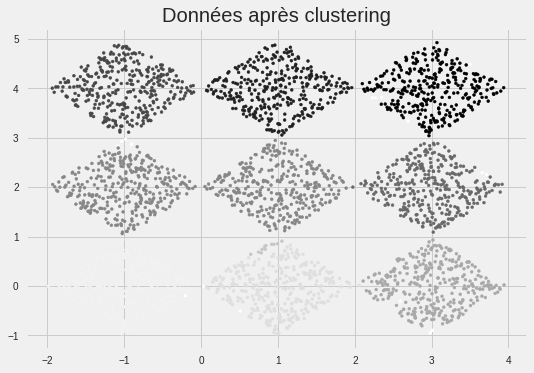

In [92]:
dbscan_application(diamond_ds, f0_diamond, f1_diamond, 0.13, 5)

### Finding the correct value for eps

In [93]:
dbscan_iteration(diamond_ds, 0.1, 0.18, 0.01)

,Eps value,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin Score
0.10,0.10,0.020827,0.009791,269.147228,1.909663
0.11,0.11,0.024041,0.097371,1147.901314,2.671799
0.12,0.12,0.024481,0.406885,2918.510752,6.013819
0.13,0.13,0.018036,0.406332,2865.665242,1.631872
0.14,0.14,0.116613,0.290047,1191.902243,2.286882
0.15,0.15,0.018585,0.089151,634.712075,0.982200
0.16,0.16,0.019742,-0.000140,326.774264,0.788243
0.17,0.17,0.019134,0.146237,2.225485,0.630324


## Banana


### Application with "random" min-sample and eps parameters.

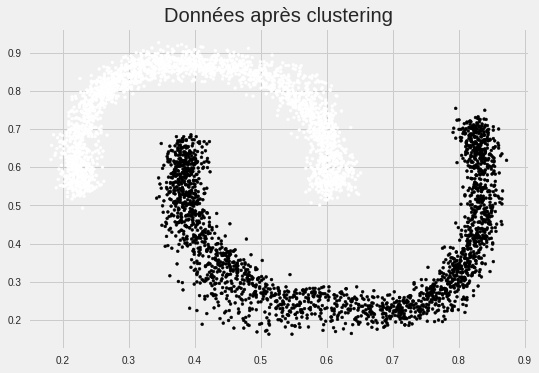

In [94]:
dbscan_application(banana_ds, f0_bananas, f1_bananas, 0.05, 5)

### Finding the correct values of eps

In [95]:
dbscan_iteration(banana_ds, 0.01, 0.08, 0.01)

,Eps value,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin Score
0.01,0.01,0.036183,-0.339299,296.997983,1.933330
0.02,0.02,0.037586,0.232342,1871.851292,2.577215
0.03,0.03,0.046513,0.188119,1875.818915,4.342311
0.04,0.04,0.050706,0.367331,3751.730467,1.098900
0.05,0.05,0.052414,0.367331,3751.730467,1.098900
0.06,0.06,0.057232,0.367331,3751.730467,1.098900
0.07,0.07,0.058936,0.367331,3751.730467,1.098900
0.08,0.08,0.060216,0.367331,3751.730467,1.098900


## Rings

### Application with "random" min-sample and eps parameters

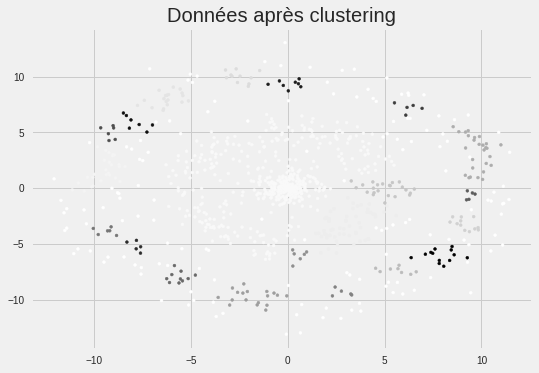

In [96]:
dbscan_application(rings_ds, f0_rings, f1_rings, 0.8, 5)

### Finding the correct values of eps

In [97]:
dbscan_iteration(rings_ds, 0.1, 1, 0.1)

,Eps value,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin Score
0.1,0.1,0.008580,-0.308945,0.040574,22.884915
0.2,0.2,0.007050,-0.247620,0.099335,30.961615
0.3,0.3,0.007372,-0.226008,2.936954,28.596807
0.4,0.4,0.008152,-0.121418,5.929582,4.589179
0.5,0.5,0.008640,-0.026593,8.306166,2.666356
0.6,0.6,0.009063,0.024920,15.134076,2.307219
0.7,0.7,0.008888,0.116652,27.205148,2.140814
0.8,0.8,0.009279,0.095892,47.144118,1.804118
0.9,0.9,0.010068,0.186796,72.706922,1.877037


## Elly 

### Application with "random" min-sample and eps parameters

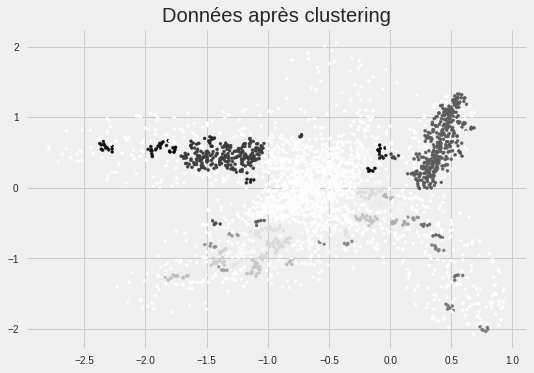

In [98]:
dbscan_application(elly_ds, f0_elly, f1_elly, 0.05, 5)

### Finding the correct value for eps

In [99]:
dbscan_iteration(elly_ds, 0.15, 0.25, 0.01)

,Eps value,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin Score
0.15,0.15,0.025187,0.144366,15.855146,2.071836
0.16,0.16,0.022624,0.250120,16.874057,2.110947
0.17,0.17,0.022520,0.271745,29.456116,2.709803
0.18,0.18,0.022810,0.334730,1.796058,6.357538
0.19,0.19,0.023858,0.323341,1.392983,6.589209
0.20,0.20,0.024526,0.309754,5.417685,1.945732
0.21,0.21,0.024850,0.347457,5.126974,1.835272
0.22,0.22,0.027897,0.344893,2.367174,2.586622
0.23,0.23,0.025331,0.348348,0.680006,4.286827
0.24,0.24,0.025785,0.249193,2.500783,0.543630


## Spiral

### Application with "random" min-sample and eps parameters

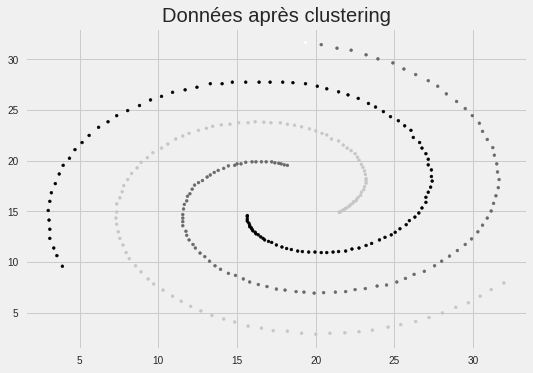

In [100]:
dbscan_application(spiral_ds, f0_spiral, f1_spiral, 2, 5)

### Finding the correct value for eps

In [101]:
dbscan_iteration(spiral_ds, 1, 4, 0.5)

,Eps value,Time,Silhouette coefficient,Calinski Harabasz,Davies Bouldin Score
1.0,1.0,0.002422,-0.142786,7.064867,3.097372
1.5,1.5,0.002901,-0.121923,8.158932,5.753284
2.0,2.0,0.002534,-0.079157,4.702673,4.603146
2.5,2.5,0.002485,0.001344,5.797852,5.882023
3.0,3.0,0.002750,0.001344,5.797852,5.882023
3.5,3.5,0.002776,0.001344,5.797852,5.882023


# Clustering HDBSCAN

Il y avait des nouveaux changements sur le TP donc il faut faire seulement le méthode et après comparer les resultats et les diférences de performances (en temps de calcul) avec dbscan. Là on peut dire que hdbscan fonctionne bien avec les datasets circulaires (banana) et pas avec les autres. 

In [102]:
!pip install hdbscan

import hdbscan

     |████████████████████████████████| 6.4 MB 12.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.27-cp37-cp37m-linux_x86_64.whl size=2311970 sha256=472569bb7799dec9789c762bf827e9ad88a18d7a9dc102a7f724548b2be53a5a
  Stored in directory: /root/.cache/pip/wheels/73/5f/2f/9a259b84003b84847c259779206acecabb25ab56f1506ee72b
Successfully built hdbscan


In [103]:
def hdbscan_application(dataset, f0, f1, min_cluster_size, min_samples):
  start = default_timer()
  hdbscan_predict = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples).fit_predict(dataset)
  stop = default_timer()
  plt.scatter(f0, f1, c=hdbscan_predict,s=8)
  plt.title("Données après clustering")
  plt.show()
  time_taken = stop - start
  silhouette_score = metrics.silhouette_score(dataset, hdbscan_predict, metric='euclidean')
  print(f'Time taken: {time_taken}')
  print(f'Silhouette Score is: {silhouette_score}')

## Diamond

### Application with "random" min-cluster-size


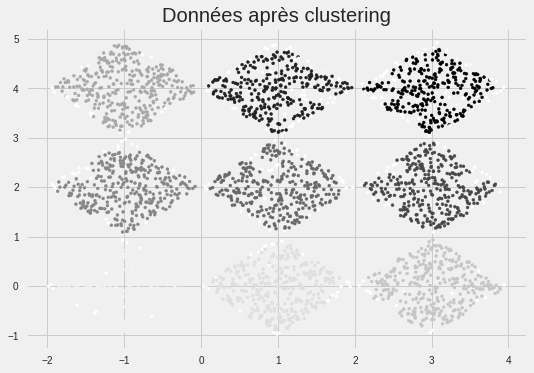

Time taken: 0.0730399630001557
Silhouette Score is: 0.45293655514009445


In [104]:
hdbscan_application(diamond_ds, f0_diamond, f1_diamond, 20, 9)

## Banana

### Application with "random" min-cluster-size

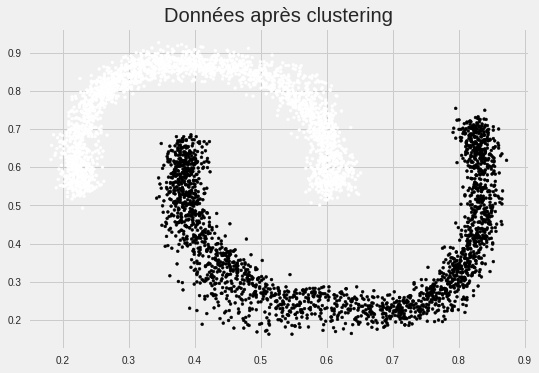

Time taken: 0.13784435499997016
Silhouette Score is: 0.36733109590793084


In [105]:
hdbscan_application(banana_ds, f0_bananas, f1_bananas, 5, 2)

## Rings

### Application with "random" min-cluster-size 

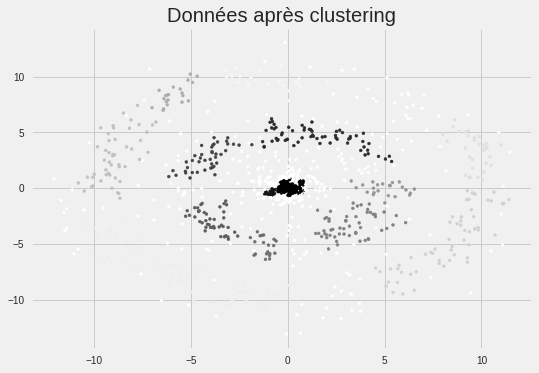

Time taken: 0.022476501000028293
Silhouette Score is: 0.09160074561804266


In [106]:
hdbscan_application(rings_ds, f0_rings, f1_rings, 20,3)

## Elly

### Application with "random" min-cluster-size 

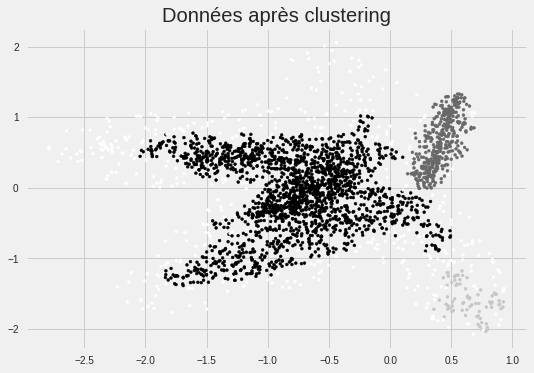

Time taken: 0.08830681299991738
Silhouette Score is: 0.278848609198867


In [107]:
hdbscan_application(elly_ds, f0_elly, f1_elly, 20, 10)

## Spiral

### Application with "random" min-cluster-size

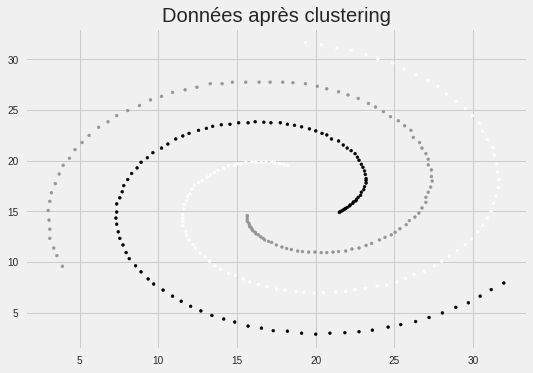

Time taken: 0.010658380999984729
Silhouette Score is: 0.0013442973442779936


In [108]:
hdbscan_application(spiral_ds, f0_spiral, f1_spiral, 20, 3)